# About

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

# Title: Car Sale Dataset

Source:

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


Description:

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences

# Features:

- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
- Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
- Customer Name: The name of the customer who purchased the car, represented as a string
- Gender: The gender of the customer, categorized as "Male" or "Female.
- Annual Income: The customer's annual income in US dollars, represented as a numeric value
- Dealer_Name: The name of the dealership selling the car, represented as a string
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
- Model: The specific model name of the car, such as "Corolla," "Civic," etc
- Engine: The engine type of the car, such as "V6," "I4," etc
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue")
- Price ($): The selling price of the car in US dollars
- Dealer_No: A unique identifier for each car dealer in the dataset
- Body Style: The body style of the car, such as "Sedan," "SUV," etc
- Phone: The phone number of the customer who purchased the car
- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc

# Questions:

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricingtrends
3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
4. What is the distribution of car prices across different regions
5. What is the distribution of cars based on body styles
6. How does the average selling price of cars vary by customer gender and annual income
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region
8. How does the average car price differ between cars with different engine sizes
9. How do car prices vary based on the customer’s annual income bracketO
10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation
12. Is there any seasonal trend in car sales based on the date of saleO
13. How does the car price distribution change when considering different combinations of body style and transmission type
14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact
15. How does the average car price vary across different car models and engine types?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Car Sale.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

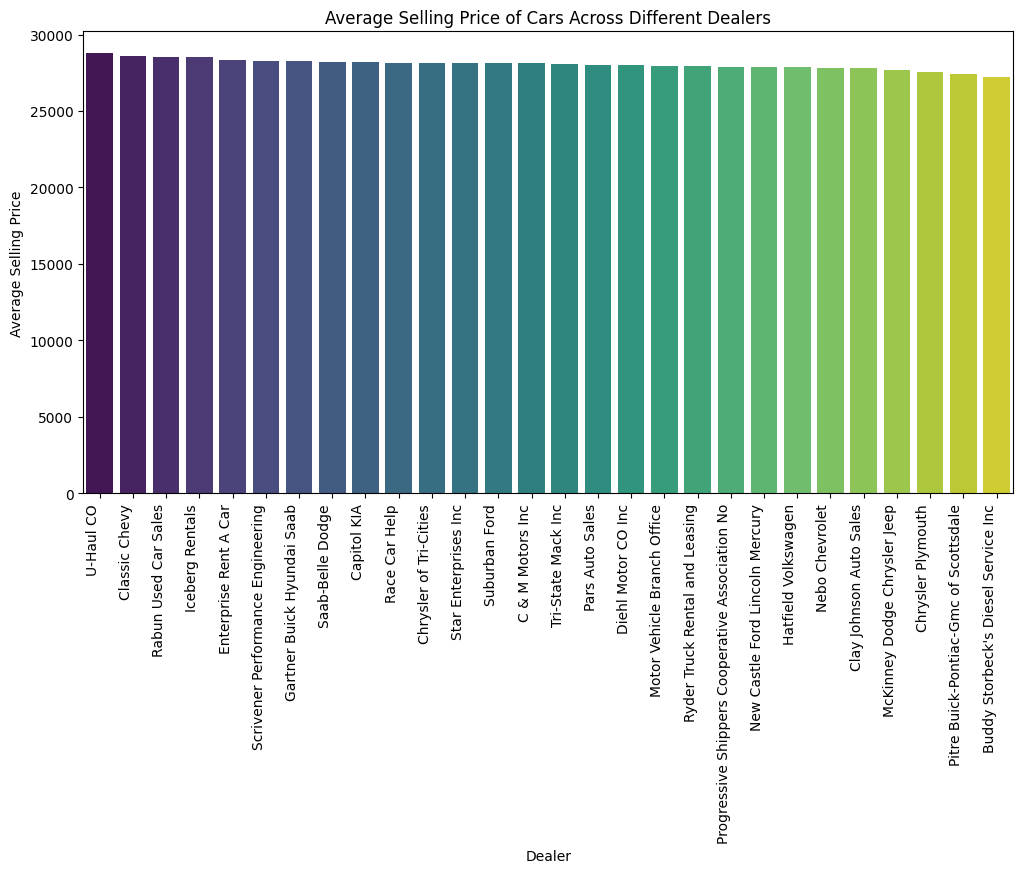

In [ ]:
# average selling price of cars for each dealer, and how does it compare across different dealers

# Group by 'Dealer' and calculate the average selling price
avg_selling_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort the values for better visualization
avg_selling_price = avg_selling_price.sort_values(by='Price ($)', ascending=False)

# Display the average selling prices
print(avg_selling_price)

# Visualize with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_selling_price, x='Dealer_Name', y='Price ($)', palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Average Selling Price of Cars Across Different Dealers')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price');

Company with Highest Price Variation: Lincoln


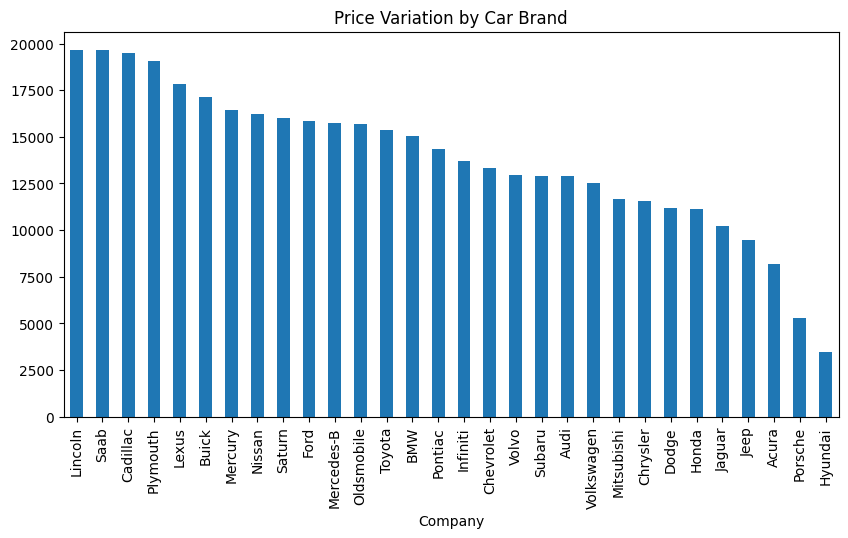

In [ ]:
# Which car brand (Company) has the highest variation in prices, and What does it tells about pricing trends

# Calculate and sort price variation
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Display top company and plot
print("Company with Highest Price Variation:", price_variation.index[0])
price_variation.plot(kind='bar', figsize=(10, 5), title="Price Variation by Car Brand");



# Insights About Pricing Trends:

## High Price Variation:
Brands like Lincoln, Saab, Cadillac show the highest price variation, indicating that these brands offer a wide range of models, from luxury to standard vehicles.

## Luxury Vehicles:
The higher variation for top brands often suggests a mix of premium, mid-range, and possibly older models, leading to a broader price distribution.

## Low Price Variation:
Brands like Hyundai and Porsche show lower price variation, suggesting more standardized pricing, possibly due to a limited model range or a focus on specific market segments.

## Premium vs Standard:
High variation often correlates with brands that serve multiple segments, while low variation reflects focused or specialized product offerings.

Overall, brands with diverse models and varying price points exhibit higher price variation, while brands with standardized offerings show consistent pricing trends.

In [ ]:
df.Transmission.value_counts()

,count
Transmission,
Auto,12571
Manual,11335


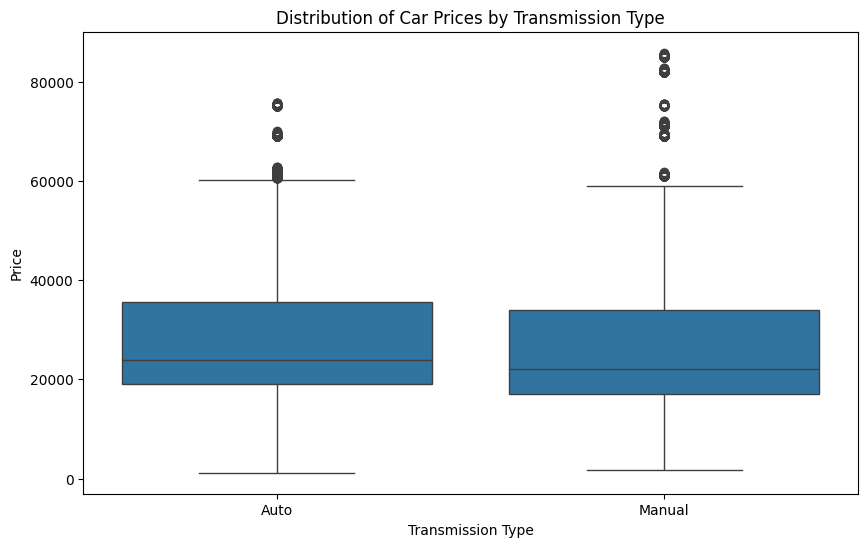

In [ ]:
#  distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price");

In [23]:
# distribution of car prices across different regions
df.groupby('Dealer_Region')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Dealer_Region,
Greenville,15101.538328
Aurora,15026.207252
Austin,14903.884549
Scottsdale,14902.916820
Pasco,14659.315941
Middletown,14619.842395
Janesville,14344.995638


In [26]:
# distribution of cars based on body styles
df.groupby('Body Style')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Body Style,
Passenger,16338.856359
Sedan,14795.682187
Hatchback,14659.696568
Hardtop,14070.057753
SUV,14014.210149


In [32]:
#  average selling price of cars vary by customer gender and annual income
df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

In [40]:
# distribution of car prices by region, and how does the number of cars sold vary by region
df.groupby('Dealer_Region')['Price ($)'].std().sort_values(ascending=False)


,Price ($)
Dealer_Region,
Greenville,15101.538328
Aurora,15026.207252
Austin,14903.884549
Scottsdale,14902.916820
Pasco,14659.315941
Middletown,14619.842395
Janesville,14344.995638


In [43]:
#  average car price differ between cars with different engine sizes
df.groupby('Engine')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Engine,
Overhead Camshaft,15862.871978
DoubleÂ Overhead Camshaft,13747.070597


In [47]:
#  car prices vary based on the customer’s annual income bracket
df.groupby('Annual Income')['Price ($)'].mean()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


In [55]:
df.Model.value_counts().head(5)

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


<Figure size 1000x600 with 0 Axes>

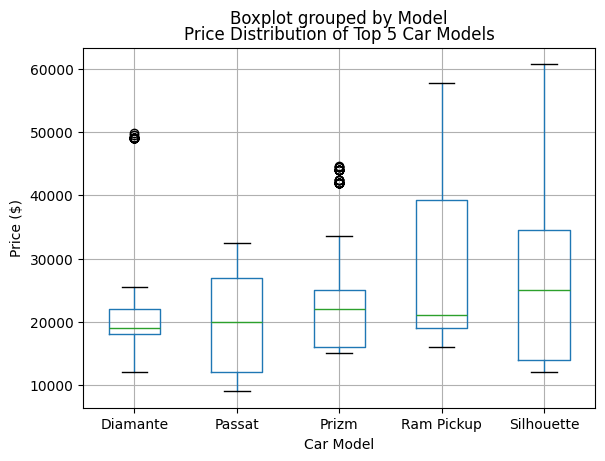

In [64]:
top_models = df['Model'].value_counts().head(5).index

# Filter dataset for the top 5 models
top_models_data = df[df['Model'].isin(top_models)]

# Plot price distribution for the top 5 models using boxplot
plt.figure(figsize=(10, 6))
top_models_data.boxplot(column='Price ($)', by='Model')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)');

In [66]:
# car price vary with engine size across different car colors, and which colors have the highest price variation
df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


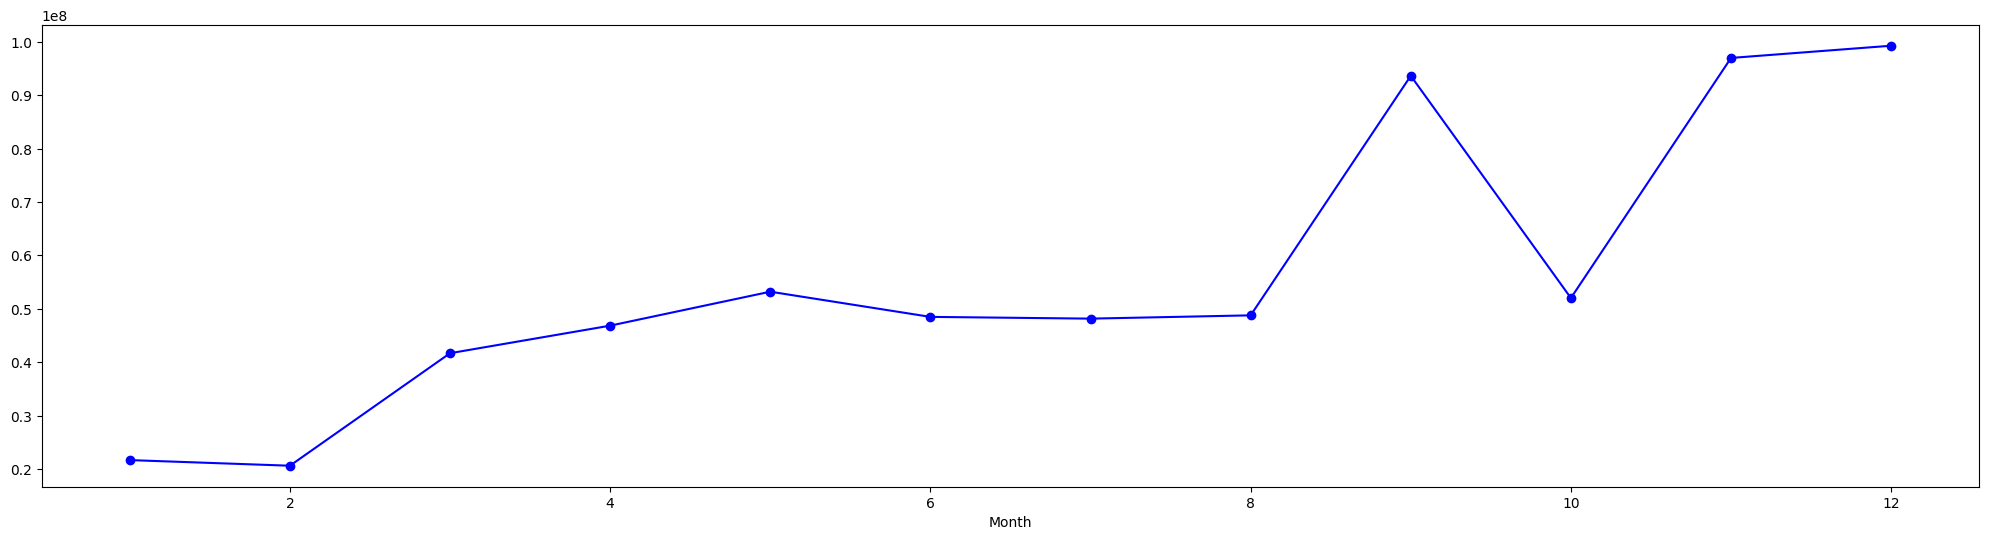

In [70]:
# seasonal trend in car sales based on the date of sale
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Price ($)'].sum()
plt.figure(figsize=(25, 6))
sales_by_month.plot(kind='line', marker='o', color='b');

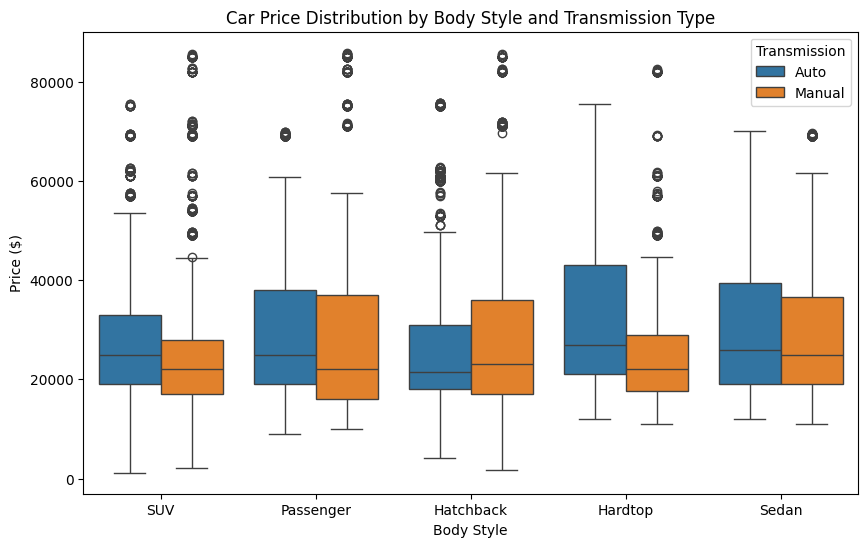

In [71]:
# car price distribution change when considering different combinations of body style and transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)");

                Price ($)  Engine_Numeric  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine_Numeric        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


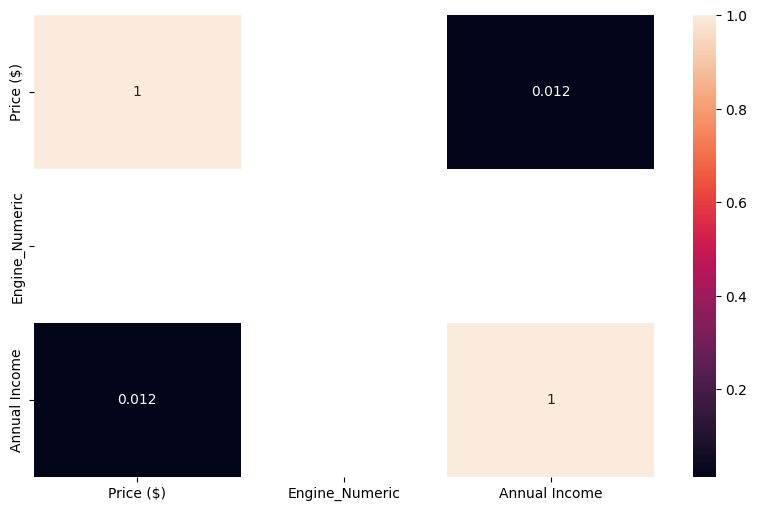

In [80]:
# correlation between car price, engine size, and annual income of customers, and how do these features intect
# Convert 'Engine' column to numeric, handling non-numeric values
df['Engine_Numeric'] = pd.to_numeric(df['Engine'], errors='coerce')  # 'coerce' converts non-numeric to NaN

# Calculate correlation with the new numeric column
correlation_matrix = df[['Price ($)','Engine_Numeric', 'Annual Income']].corr()

# Display the correlation matrix
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True);

In [81]:
#  average car price vary across different car models and engine types
df.groupby(['Model', 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64